In [53]:
import torch
import os
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
import gradio as gr
import numpy as np
from model import Generator
import pandas as pd
import torchvision.utils as vutils  # Import vutils
import matplotlib.pyplot as plt

## Translating images randomly from CelebFace dataset

In [82]:
checkpoint_dir = "checkpoints/checkpoint.pth"
G = Generator()
num_labels = 5

if checkpoint_dir and os.path.exists(checkpoint_dir):
    checkpoint = torch.load(checkpoint_dir, map_location=torch.device('cpu'))
    G.load_state_dict(checkpoint['model_G_state_dict'])
    print("Checkpoint loaded successfully.")
else:
    print("No checkpoint found for model.")


def generate(file):
    input_img = Image.open(os.path.join('data/img_align_celeba', file))
    # print(input_img.size)
    # image_array = np.array(input_img)
    
    crop_size = 178
    image_size = 128
    
    transform = []        
    transform.append(T.CenterCrop(crop_size))
    transform.append(T.Resize(image_size))
    transform.append(T.ToTensor())
    transform.append(T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)))
    transform = T.Compose(transform)
    x_real = transform(input_img)
    x_real = x_real.unsqueeze(0)
    all_images = []
    generated_images = []
    for k in range(num_labels):
        # Create one-hot label for the k-th class
        one_hot_label = torch.zeros((1, num_labels))
        one_hot_label[0, k] = 1
    
        # Generate the image
        with torch.no_grad():
            fake_image = G(x_real[0].unsqueeze(0), one_hot_label).detach().cpu()
        # print(fake_image.shape)
    
        generated_images.append(fake_image.squeeze(0))
    
    all_images = generated_images
    x_real[0] = (x_real[0] - x_real[0].min()) / (x_real[0].max() - x_real[0].min())
    plt.title(f'Real Image')
    plt.imshow(np.transpose(x_real[0].numpy(), (1, 2, 0)))
    
    # Create a grid of all images
    all_images_grid = vutils.make_grid(all_images, nrow=num_labels + 1, normalize=True, scale_each=True)
    
    plt.figure(figsize=(20, 5))
    plt.imshow(np.transpose(all_images_grid.numpy(), (1, 2, 0)))
    plt.title(f'Generated Images for Real Image')
    plt.axis('off')
    plt.show()

Checkpoint loaded successfully.


In [83]:
attr_lst = pd.read_csv('data/list_attr_celeba.csv')
attr_lst = attr_lst.sample(frac=1, random_state=42).reset_index(drop=True)

file_names = np.array(attr_lst['image_id'])
print(file_names.size)
file_names

202599


array(['093242.jpg', '121414.jpg', '010625.jpg', ..., '131933.jpg',
       '146868.jpg', '121959.jpg'], dtype=object)

## **Run the below cell as many times as you want to generate images for a random image**

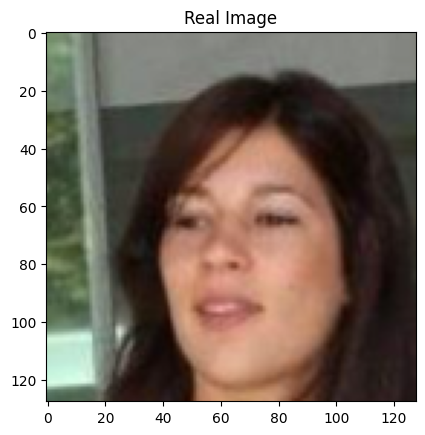

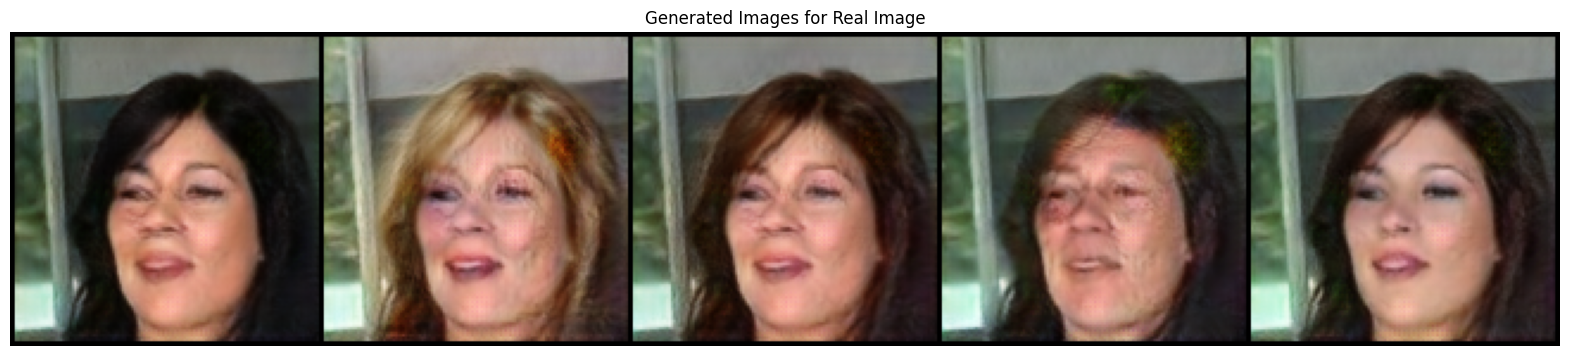

In [90]:
file = np.random.choice(file_names)
generate(file)